In [2]:
# imporitng the necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from scipy.io import loadmat
from scipy.linalg import lstsq
from scipy.spatial.distance import mahalanobis
import requests

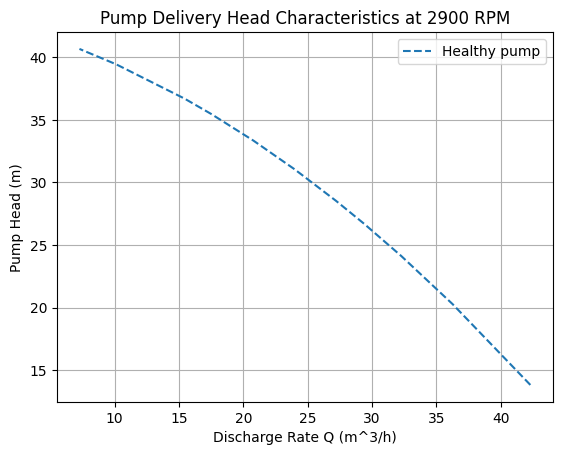

In [3]:
# Downloading the .mat file
url = 'https://www.mathworks.com/supportfiles/predmaint/fault-diagnosis-of-centrifugal-pumps-using-steady-state-experiments/PumpCharacteristicsData.mat'
response = requests.get(url)
with open('PumpCharacteristicsData.mat', 'wb') as file:
    file.write(response.content)

# loading the data from MATLAB files
data = scipy.io.loadmat('PumpCharacteristicsData.mat')
Q0 = data['Q0'].flatten()
H0 = data['H0'].flatten()
M0 = data['M0'].flatten()

# Plot the data
plt.figure()
plt.plot(Q0, H0, '--')
plt.xlabel('Discharge Rate Q (m^3/h)')
plt.ylabel('Pump Head (m)')
plt.title('Pump Delivery Head Characteristics at 2900 RPM')
plt.grid(True)
plt.legend(['Healthy pump'])
plt.show()

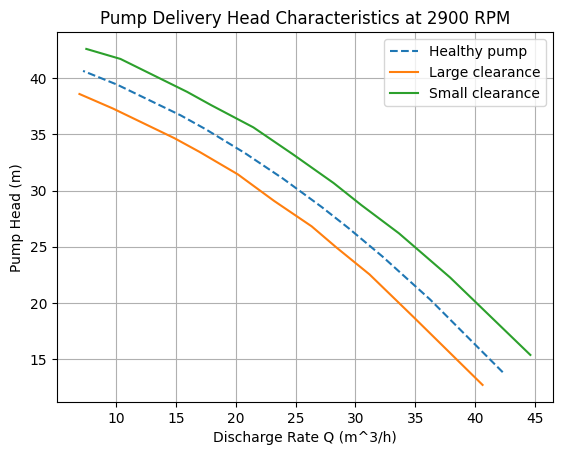

In [4]:
# Load the data from the .mat file
data = scipy.io.loadmat('PumpCharacteristicsData.mat')
Q0 = data['Q0'].flatten()
H0 = data['H0'].flatten()
M0 = data['M0'].flatten()
Q1 = data['Q1'].flatten()
H1 = data['H1'].flatten()
M1 = data['M1'].flatten()
Q2 = data['Q2'].flatten()
H2 = data['H2'].flatten()
M2 = data['M2'].flatten()

# Plot the data
plt.figure()
plt.plot(Q0, H0, '--', label='Healthy pump')
plt.plot(Q1, H1, label='Large clearance')
plt.plot(Q2, H2, label='Small clearance')
plt.xlabel('Discharge Rate Q (m^3/h)')
plt.ylabel('Pump Head (m)')
plt.title('Pump Delivery Head Characteristics at 2900 RPM')
plt.grid(True)
plt.legend()
plt.show()

In [5]:
# Linear fitting
import numpy as np
from scipy.linalg import lstsq

# Explanation
# Data Preparation: Ensure your data (Q, H, M) are numpy arrays. Convert them if they are not already in that format.
# Least Squares Fitting: The 'lstsq' function returns multiple values: coefficients, residuals, rank, and singular values. 
# We only need the coefficients for the fit.

# Function to perform linear fitting
def linear_fit(Q, H, M):
    A = np.vstack([Q**2, Q, np.ones(len(Q))]).T
    
    # Perform least squares fitting for H
    coeffs_H, residuals_H, rank_H, s_H = lstsq(A, H)
    hnn, hnv, hvv = coeffs_H
    
    # Perform least squares fitting for M
    coeffs_M, residuals_M, rank_M, s_M = lstsq(A, M)
    k0, k1, k2 = coeffs_M
    
    return hnn, hnv, hvv, k0, k1, k2

# Assuming Q0, H0, M0, Q1, H1, M1, Q2, H2, M2 are numpy arrays
hnn_0, hnv_0, hvv_0, k0_0, k1_0, k2_0 = linear_fit(Q0, H0, M0)
hnn_1, hnv_1, hvv_1, k0_1, k1_1, k2_1 = linear_fit(Q1, H1, M1)
hnn_2, hnv_2, hvv_2, k0_2, k1_2, k2_2 = linear_fit(Q2, H2, M2)

print(f"Healthy: hnn={hnn_0}, hnv={hnv_0}, hvv={hvv_0}, k0={k0_0}, k1={k1_0}, k2={k2_0}")
print(f"Large Clearance: hnn={hnn_1}, hnv={hnv_1}, hvv={hvv_1}, k0={k0_1}, k1={k1_1}, k2={k2_1}")
print(f"Small Clearance: hnn={hnn_2}, hnv={hnv_2}, hvv={hvv_2}, k0={k0_2}, k1={k1_2}, k2={k2_2}")


Healthy: hnn=-0.010421003558784385, hnv=-0.24982938063505877, hvv=43.02929177523412, k0=-0.01653506705528327, k1=0.9670517088456927, k2=2.3725916275613663
Large Clearance: hnn=-0.0110818371944934, hnv=-0.2424990782355828, hvv=40.78002713315033, k0=-0.016470696277899974, k1=0.9155605184843169, k2=2.5469320063261613
Small Clearance: hnn=-0.00946556247359907, hnv=-0.24581688895428766, hvv=45.14203000544311, k0=-0.015886205286336545, k1=1.0035251782037036, k2=2.242903233614568


In [6]:
import numpy as np
from scipy.linalg import lstsq
from scipy.spatial.distance import mahalanobis

# Function to perform linear fitting
def linear_fit(Q, H, M):
    A = np.vstack([Q**2, Q, np.ones(len(Q))]).T
    
    # Perform least squares fitting for H
    coeffs_H, residuals_H, rank_H, s_H = lstsq(A, H)
    hnn, hnv, hvv = coeffs_H
    
    # Perform least squares fitting for M
    coeffs_M, residuals_M, rank_M, s_M = lstsq(A, M)
    k0, k1, k2 = coeffs_M
    
    return hnn, hnv, hvv, k0, k1, k2

# Assuming Q0, H0, M0, Q1, H1, M1, Q2, H2, M2 are numpy arrays
hnn_0, hnv_0, hvv_0, k0_0, k1_0, k2_0 = linear_fit(Q0, H0, M0)
hnn_1, hnv_1, hvv_1, k0_1, k1_1, k2_1 = linear_fit(Q1, H1, M1)
hnn_2, hnv_2, hvv_2, k0_2, k1_2, k2_2 = linear_fit(Q2, H2, M2)

# Healthy pump parameters with multiple perturbed samples
perturbations = np.array([
    [1.01, 1.01, 0.99, 0.99, 1.01, 0.99],
    [0.99, 0.99, 1.01, 1.01, 0.99, 1.01],
    [1.02, 0.98, 1.00, 1.00, 1.02, 0.98],
    [0.98, 1.02, 0.98, 1.02, 0.98, 1.02]
])

parameters_healthy = np.array([[hnn_0, hnv_0, hvv_0, k0_0, k1_0, k2_0]])
for p in perturbations:
    perturbed_sample = parameters_healthy[-1] * p
    parameters_healthy = np.vstack([parameters_healthy, perturbed_sample])

# Test pump parameters as 2D arrays
parameters_test_1 = np.array([hnn_1, hnv_1, hvv_1, k0_1, k1_1, k2_1])
parameters_test_2 = np.array([hnn_2, hnv_2, hvv_2, k0_2, k1_2, k2_2])

# Calculate mean and covariance for healthy parameters
mean_healthy = np.mean(parameters_healthy, axis=0)
cov_healthy = np.cov(parameters_healthy, rowvar=False)

# Apply shrinkage to the covariance matrix
shrinkage = 1e-6
cov_healthy += shrinkage * np.eye(cov_healthy.shape[0])

# Debugging statements
print(f"Mean healthy parameters:\n{mean_healthy}")
print("\n",f"Covariance matrix of healthy parameters with shrinkage:\n{cov_healthy}")

# Ensure the covariance matrix is invertible
det_cov = np.linalg.det(cov_healthy)
print(f"Determinant of covariance matrix: {det_cov}")
if det_cov == 0:
    raise ValueError("Covariance matrix is singular and cannot be inverted.")

# Combine test parameters into a single array
test_params = np.array([parameters_test_1, parameters_test_2])

# Function to compute Mahalanobis distance
def compute_mahalanobis(test_params, mean_params, cov_params):
    inv_cov = np.linalg.inv(cov_params)
    distances = []
    for params in test_params:
        distance = mahalanobis(params, mean_params, inv_cov)
        distances.append(distance)
    return distances

# Calculate Mahalanobis distances
mahal_distances = compute_mahalanobis(test_params, mean_healthy, cov_healthy)

print(f"Mahalanobis distances: {mahal_distances}")


Mean healthy parameters:
[-1.04820666e-02 -2.49294848e-01  4.27685515e+01 -1.65671385e-02
  9.72718253e-01  2.35802488e+00]

 Covariance matrix of healthy parameters with shrinkage:
[[ 1.00881037e-06 -1.54232461e-07 -9.59625362e-06 -7.26960528e-09
  -8.17587933e-07  1.97657375e-06]
 [-1.54232461e-07  8.51005571e-06  4.10534698e-04 -9.00325549e-08
   1.43125145e-05 -3.53435600e-05]
 [-9.59625362e-06  4.10534698e-04  1.48287309e-01  4.28894634e-05
   8.90516293e-04 -1.88738993e-03]
 [-7.26960528e-09 -9.00325549e-08  4.28894634e-05  1.03261354e-06
   6.74607217e-07 -1.48698447e-06]
 [-8.17587933e-07  1.43125145e-05  8.90516293e-04  6.74607217e-07
   7.68707934e-05 -1.83422740e-04]
 [ 1.97657375e-06 -3.53435600e-05 -1.88738993e-03 -1.48698447e-06
  -1.83422740e-04  4.45307284e-04]]
Determinant of covariance matrix: 3.886799877854593e-28
Mahalanobis distances: [26.08164936915442, 19.379501150275637]


In [8]:
import numpy as np
from scipy.stats import chi2

# Healthy pump parameters with multiple perturbed samples
perturbations = np.array([
    [1.01, 1.01, 0.99, 0.99, 1.01, 0.99],
    [0.99, 0.99, 1.01, 1.01, 0.99, 1.01],
    [1.02, 0.98, 1.00, 1.00, 1.02, 0.98],
    [0.98, 1.02, 0.98, 1.02, 0.98, 1.02]
])

parameters_healthy = np.array([[hnn_0, hnv_0, hvv_0, k0_0, k1_0, k2_0]])
for p in perturbations:
    perturbed_sample = parameters_healthy[-1] * p
    parameters_healthy = np.vstack([parameters_healthy, perturbed_sample])

# Calculate mean and covariance for healthy parameters
mean_healthy = np.mean(parameters_healthy, axis=0)
cov_healthy = np.cov(parameters_healthy, rowvar=False)

# Calculate Mahalanobis distances for healthy pumps
inv_cov = np.linalg.inv(cov_healthy)
mahal_distances_healthy = [
    np.sqrt(np.dot(np.dot(p - mean_healthy, inv_cov), p - mean_healthy))
    for p in parameters_healthy
]

# Fit a Chi-square distribution
degrees_of_freedom = len(mean_healthy)
threshold = chi2.ppf(0.95, df=degrees_of_freedom)  # 95% confidence level

# Function to calculate Mahalanobis distance
def calculate_mahalanobis(params, mean, inv_cov):
    diff = params - mean
    return np.sqrt(np.dot(np.dot(diff, inv_cov), diff))

# Example new pump parameters
new_pump_params = np.array([-0.01108, -0.24249, 40.78002, -0.01647, 0.91556, 2.54693])
mahal_distance_new_pump = calculate_mahalanobis(new_pump_params, mean_healthy, inv_cov)

# Classify the new pump
if mahal_distance_new_pump < threshold:
    print("Pump is healthy")
else:
    print("Pump is potentially faulty")

print(f"Threshold: {threshold}")
print(f"Mahalanobis distance of the new pump: {mahal_distance_new_pump}")

Pump is potentially faulty
Threshold: 12.591587243743977
Mahalanobis distance of the new pump: nan


C:\Users\srian\AppData\Local\Temp\ipykernel_18012\3716884407.py:24: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(np.dot(np.dot(p - mean_healthy, inv_cov), p - mean_healthy))
C:\Users\srian\AppData\Local\Temp\ipykernel_18012\3716884407.py:35: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.dot(np.dot(diff, inv_cov), diff))
